In [6]:
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import matplotlib.pyplot as plot
%matplotlib inline


In [7]:
yahoo = web.DataReader('AMZN', data_source = 'yahoo', start = '1/1/2020', end = '6/15/2022')
yahoo = yahoo.drop('Volume', axis = 1)
yahoo.head()

,High,Low,Open,Close,Adj Close
Date,,,,,
2020-01-02,94.900497,93.207497,93.750000,94.900497,94.900497
2020-01-03,94.309998,93.224998,93.224998,93.748497,93.748497
2020-01-06,95.184502,93.000000,93.000000,95.143997,95.143997
2020-01-07,95.694504,94.601997,95.224998,95.343002,95.343002
2020-01-08,95.550003,94.321999,94.902000,94.598503,94.598503


In [8]:
yahoo['Ticks'] = range(0, len(yahoo.index.values))
yahoo.head()

,High,Low,Open,Close,Adj Close,Ticks
Date,,,,,,
2020-01-02,94.900497,93.207497,93.750000,94.900497,94.900497,0
2020-01-03,94.309998,93.224998,93.224998,93.748497,93.748497,1
2020-01-06,95.184502,93.000000,93.000000,95.143997,95.143997,2
2020-01-07,95.694504,94.601997,95.224998,95.343002,95.343002,3
2020-01-08,95.550003,94.321999,94.902000,94.598503,94.598503,4


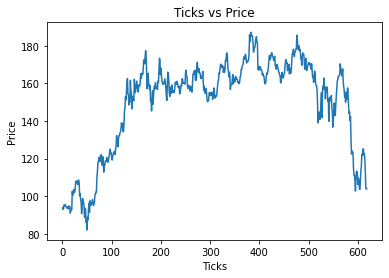

In [9]:
fig = plot.figure(1)
axis1 = fig.add_subplot(111)

axis1.set_xlabel('Ticks')
axis1.set_ylabel('Price')
axis1.set_title('Ticks vs Price')

axis1.plot('Ticks', 'Open', data = yahoo);

In [10]:
oneTenth = yahoo.sample(frac = .1, random_state = np.random.randint(10))
oneTenth.head()

,High,Low,Open,Close,Adj Close,Ticks
Date,,,,,,
2020-06-11,133.569000,126.811501,130.175003,127.898003,127.898003,111
2022-05-06,119.050499,113.081497,114.849998,114.772499,114.772499,591
2021-12-10,175.927002,170.500000,175.417007,172.212006,172.212006,490
2021-08-16,165.000000,160.556503,164.149994,164.949493,164.949493,408
2022-04-26,144.856003,138.929504,144.800003,139.391006,139.391006,583


In [11]:
oneTenth.index.name = None
oneTenth = oneTenth.sort_values(by = ['Ticks'], ascending = [True])
oneTenth.head()

,High,Low,Open,Close,Adj Close,Ticks
2020-02-07,104.926498,101.904999,102.099503,103.963997,103.963997,25
2020-03-16,87.972504,81.301498,82.075500,84.457497,84.457497,50
2020-03-26,97.824501,94.464500,95.099998,97.774498,97.774498,58
2020-04-03,96.316498,94.457497,95.557503,95.329498,95.329498,64
2020-04-07,101.786003,99.880997,100.855499,100.580002,100.580002,66


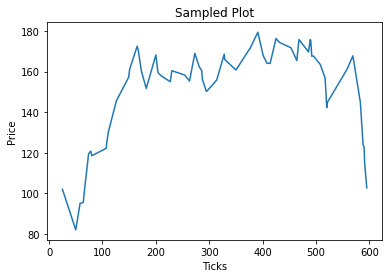

In [12]:
axes = oneTenth.plot('Ticks', 'Open', legend = False, title = 'Sampled Plot');
axes.legend = None;
axes.set_ylabel('Price');

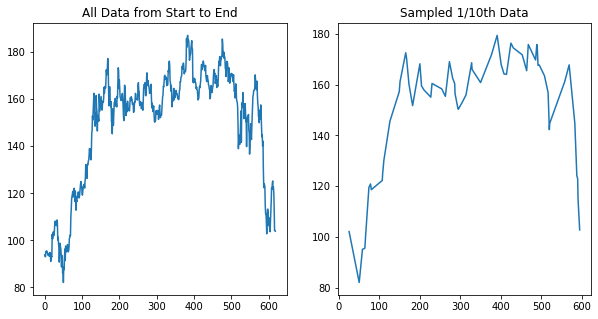

In [13]:
fig, axes = plot.subplots(nrows = 1, ncols = 2, figsize = (10, 5));

axes[0].plot('Ticks', 'Open', data = yahoo);
axes[0].set_title('All Data from Start to End');
axes[1].plot('Ticks', 'Open', data = oneTenth);
axes[1].set_title('Sampled 1/10th Data');

In [14]:
yahoo = yahoo.reset_index()
yahoo.head(3)

,Date,High,Low,Open,Close,Adj Close,Ticks
0,2020-01-02,94.900497,93.207497,93.750000,94.900497,94.900497,0
1,2020-01-03,94.309998,93.224998,93.224998,93.748497,93.748497,1
2,2020-01-06,95.184502,93.000000,93.000000,95.143997,95.143997,2


In [15]:
yahoo['Rolling Mean'] = yahoo['Open'].rolling(window=80).mean()

yahoo.head(5)

,Date,High,Low,Open,Close,Adj Close,Ticks,Rolling Mean
0,2020-01-02,94.900497,93.207497,93.750000,94.900497,94.900497,0,NaN
1,2020-01-03,94.309998,93.224998,93.224998,93.748497,93.748497,1,NaN
2,2020-01-06,95.184502,93.000000,93.000000,95.143997,95.143997,2,NaN
3,2020-01-07,95.694504,94.601997,95.224998,95.343002,95.343002,3,NaN
4,2020-01-08,95.550003,94.321999,94.902000,94.598503,94.598503,4,NaN


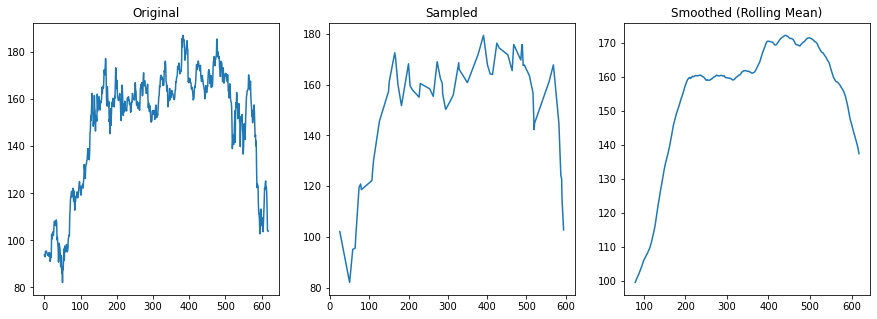

In [16]:
fig, axes = plot.subplots(nrows = 1, ncols = 3, figsize = (15, 5));

axes[0].plot('Ticks', 'Open', data = yahoo);
axes[0].set_title('Original');
axes[1].plot('Ticks', 'Open', data = oneTenth);
axes[1].set_title('Sampled');
axes[2].plot('Ticks', 'Rolling Mean', data = yahoo);
axes[2].set_title('Smoothed (Rolling Mean)');